In [1]:
# Restart the kernel
import os
current_dir ='../../'
os.chdir(current_dir)

In [2]:
from src.codes.basic import *
from src.codes.utils import *
from src.codes.base_classes import Base_class_fem_heat_conduction
from src.codes.reductor.rom_class import FEM_solver_rom_ecsw
from src.codes.algorithms.ecsw import ecsw_red


### class for data (geometry, material property, mesh)

In [3]:
nref= [10,2]
L = [20,20]
mat_layout = np.zeros((5,2),dtype=int)
src_layout = np.zeros((5,2),dtype=int)

In [4]:
fdict = {}

cond_list = []
cond_list.append( lambda T,mu: mu*T + 100. + 0.*T )
fdict["cond"] = cond_list

dcond_list = []
dcond_list.append( lambda T,mu: mu + 0. + 0.*T )
fdict["dcond"] = dcond_list

qext_list = []
qext_list.append( lambda T,mu: 0.0+1.0 + 0.*T )
fdict["qext"] = qext_list

In [5]:
bc = {}
bc['x_min']={'type':'dirichlet','value':10.0}
bc['x_max']={'type':'dirichlet','value':10.0}
bc['y_min']={'type':'dirichlet','value':10.0}
bc['y_max']={'type':'refl','value':np.nan}

In [6]:
class probdata:
    
    def __init__(self, bc, cond_layout, qext_layout, fdict, nref, L, mu, pb_dim=2):
        
        self.dim_ = pb_dim
        # refine the mesh and update material and source layouts
        repeats = np.asarray(nref, dtype=int)
        self.cell2mat_layout = self.repeat_array(mat_layout,repeats)
        self.cell2src_layout = self.repeat_array(src_layout,repeats)
        
        ## change this mapping if needed.
        
        self.fdict = fdict
        
        # mesh data
        # cells
        self.ncells = [None] * pb_dim
        self.npts = [None] * pb_dim
        self.deltas = [None] * pb_dim
        self.xi=[]
        for i in range(pb_dim):
            self.ncells[i] = self.cell2mat_layout.shape[i]
            self.npts[i] = self.ncells[i]+1
            self.xi.append(np.linspace(0,L[i],self.npts[i]))
            self.deltas[i] = L[i]/self.ncells[i]
    
        self.n_verts = np.prod(np.array(self.npts))
                
        # Create nodal connectivity for the continuous Finite Element Method (cFEM)
        self.connectivity()
                
        # Store parameter value
        self.mu = mu
        
        # Store the dirichlet nodes if any
        handle_boundary_conditions(self, bc)
        
        # Determining the global equation numbers based on dirichlet nodes and storing in class
        get_glob_node_equation_id(self, self.dir_nodes)

        # Get global node numbers and equation IDs for the current element
        self.glob_node_eqnId = []
        self.glob_node_nonzero_eqnId = []
        self.local_node_nonzero_eqnId = []
        self.Le = []
        self.global_indices = []
        self.local_indices = []

        for i in range(self.n_cells):
            get_element_global_nodes_and_nonzero_eqnId(self, i, self.node_eqnId)

    
              
    def repeat_array(self, arr,repeats):
        for dim,n in enumerate(repeats):
            arr = np.repeat(arr,n,axis=dim)
        return arr     
    
    
    def connectivity(self):
        """
        Define nodal connectivity for each cell in the mesh.
        """

        # Initialize the connectivity array
        self.n_cells = np.prod(np.array(self.ncells))
        
        self.gn = np.zeros((self.n_cells,2**self.dim_),dtype=int)

        # compute node ID from (i,j) cell identifiers
        # def node(*args):
        #     index = 0
        #     multiplier = 1
        #     for i, n in enumerate(args):
        #         index += n * multiplier
        #         if i < len(self.npts) - 1:
        #             multiplier *= self.npts[i]
        #     return index
        
        node = lambda i,j: i+j*self.npts[0]

        # Loop over all cells to define their nodal connectivity
        iel = 0
        for j in range(self.ncells[1]):
            for i in range(self.ncells[0]):
                # counter-clockwise
                self.gn[iel,0] = node(i  ,j  )
                self.gn[iel,1] = node(i+1,j  )
                self.gn[iel,2] = node(i+1,j+1)
                self.gn[iel,3] = node(i  ,j+1)
                iel += 1
  

### Simulate FOS

In [7]:
random.seed(25)
params = np.r_[1.:4.0:0.01]
quad_deg = 3
N_snap = 15 # Training Snapshots
NL_solutions = []
param_list = []
K_mus = []
q_mus = []
# 




 Snap 0 



initial residual = 11986.651822042377 

iter 0, NL residual=1324.6513464306388, delta=9.770837155448827
iter 1, NL residual=11.299873829035011, delta=-0.7630796870436435
iter 2, NL residual=0.0009297289458881234, delta=-0.00597025279632086
iter 3, NL residual=5.863596350429197e-11, delta=-3.8601837583283444e-07
Convergence !!!


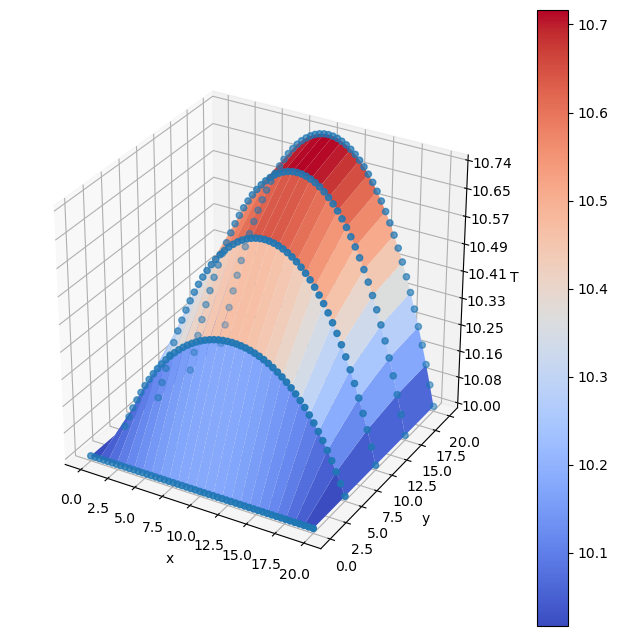




 Snap 1 



initial residual = 10796.002612555554 

iter 0, NL residual=430.1273081220602, delta=9.267220150665285
iter 1, NL residual=0.6083380775937282, delta=-0.29541303410816255
iter 2, NL residual=1.3310436522078134e-06, delta=-0.0003811418342108528
Convergence !!!


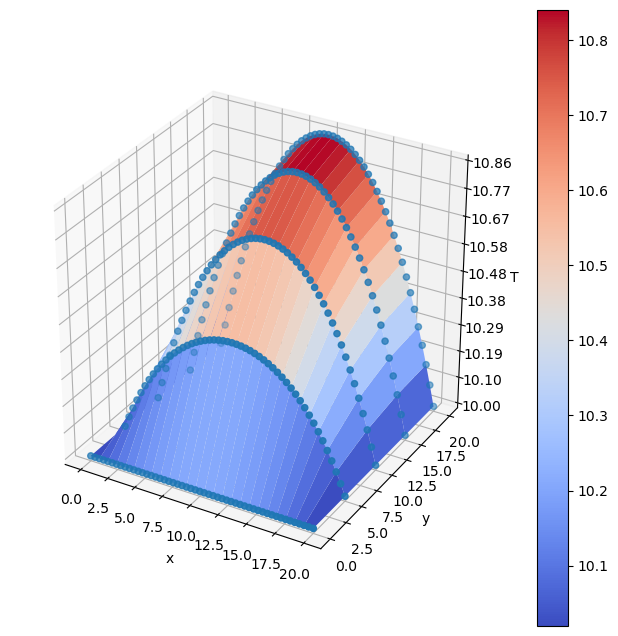




 Snap 2 



initial residual = 11448.905882745215 

iter 0, NL residual=897.9573942240792, delta=9.548205887620298
iter 1, NL residual=4.293851645158141, delta=-0.5589006266791802
iter 2, NL residual=0.0001091457821580371, delta=-0.0024418888587483434
iter 3, NL residual=4.55201871090765e-11, delta=-4.9178207860296254e-08
Convergence !!!


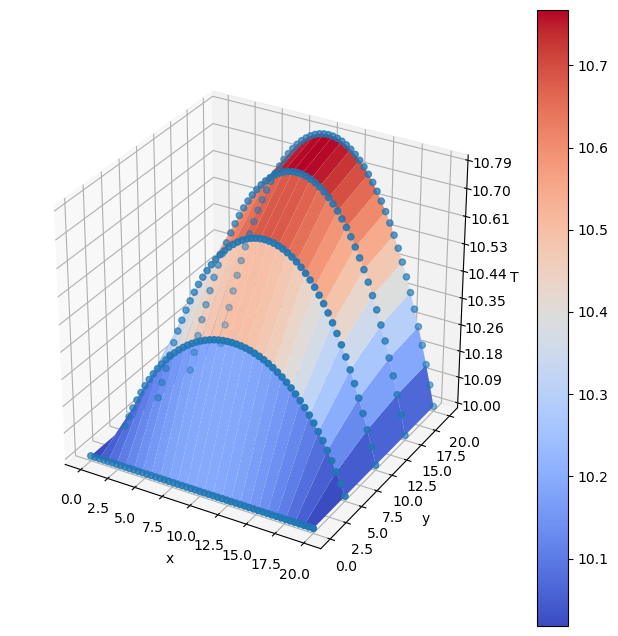




 Snap 3 



initial residual = 11749.78131183665 

iter 0, NL residual=1132.1482252709548, delta=9.673720095303679
iter 1, NL residual=7.691518785349875, delta=-0.6745323304166354
iter 2, NL residual=0.00039827846930358065, delta=-0.004195038886152979
iter 3, NL residual=5.76955941131255e-11, delta=-1.7129744545449967e-07
Convergence !!!


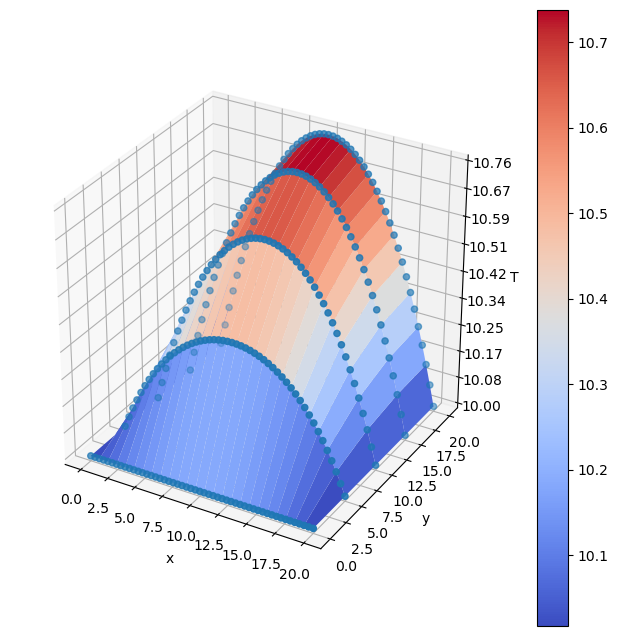




 Snap 4 



initial residual = 12300.359246313501 

iter 0, NL residual=1590.500199072437, delta=9.897218008177278
iter 1, NL residual=17.490484433739706, delta=-0.8770728266283285
iter 2, NL residual=0.002417843817180866, delta=-0.00887262198503041
iter 3, NL residual=7.296817667895163e-11, delta=-9.597222523700614e-07
Convergence !!!


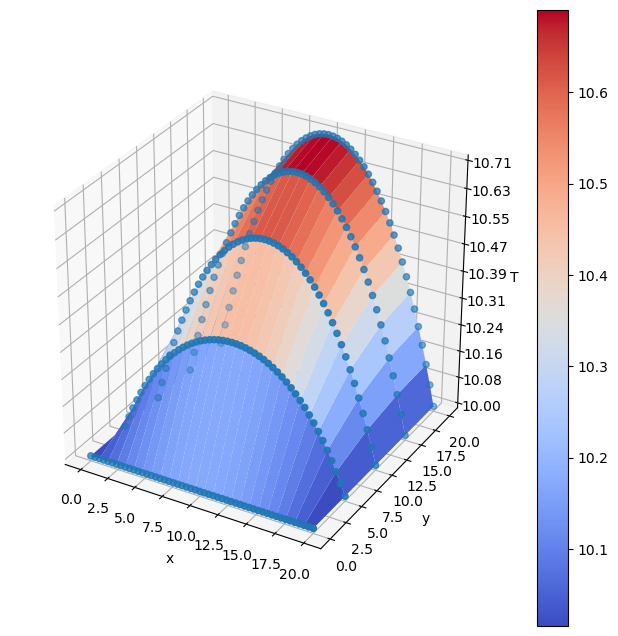




 Snap 5 



initial residual = 10885.611499624636 

iter 0, NL residual=491.0283663493382, delta=9.306502851811977
iter 1, NL residual=0.8733120002638732, delta=-0.3326148382031104
iter 2, NL residual=3.0272816895873947e-06, delta=-0.0005396394097674344
Convergence !!!


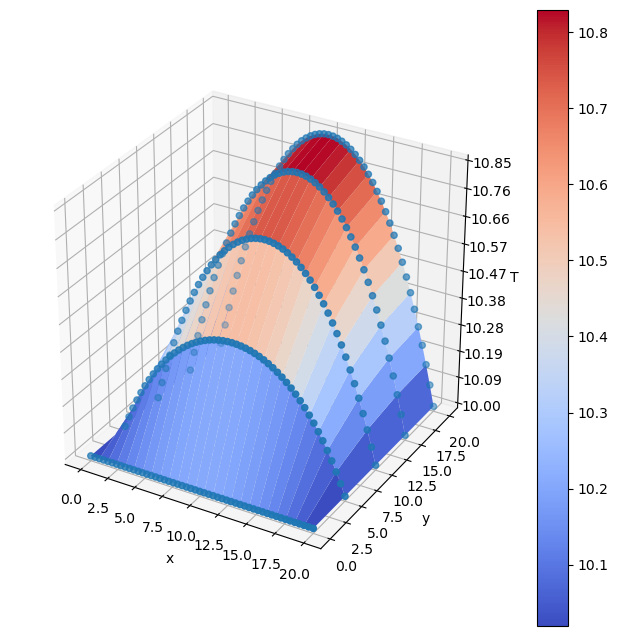




 Snap 6 



initial residual = 11583.337561782488 

iter 0, NL residual=1001.1582842065261, delta=9.604587739539669
iter 1, NL residual=5.657694313410112, delta=-0.6110072666295774
iter 2, NL residual=0.00020166032680943424, delta=-0.0031573139218115556
iter 3, NL residual=5.631711341751676e-11, delta=-8.897178890772488e-08
Convergence !!!


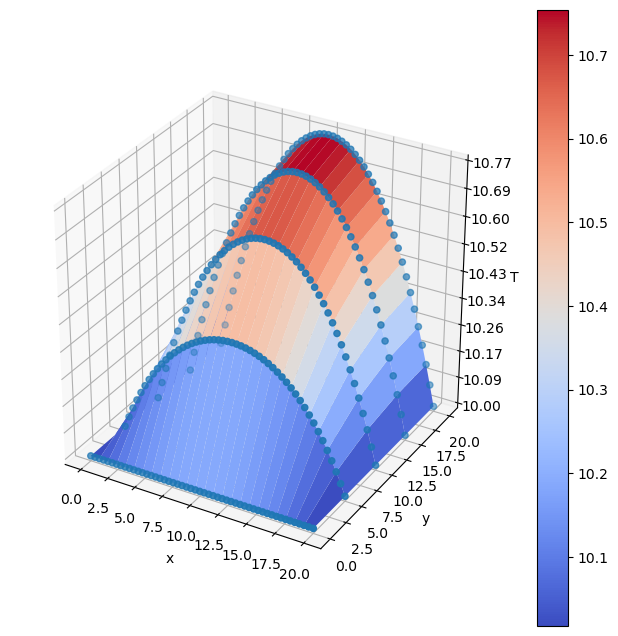




 Snap 7 



initial residual = 10860.008779488995 

iter 0, NL residual=473.51981633681385, delta=9.295302912700691
iter 1, NL residual=0.7911917502548279, delta=-0.32201977420425854
iter 2, NL residual=2.419302912087643e-06, delta=-0.0004908223594698444
Convergence !!!


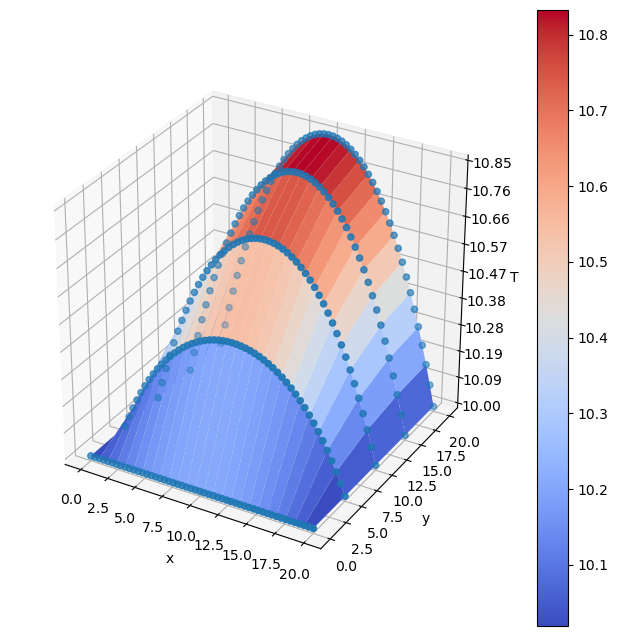




 Snap 8 



initial residual = 11749.78131183665 

iter 0, NL residual=1132.1482252709548, delta=9.673720095303679
iter 1, NL residual=7.691518785349875, delta=-0.6745323304166354
iter 2, NL residual=0.00039827846930358065, delta=-0.004195038886152979
iter 3, NL residual=5.76955941131255e-11, delta=-1.7129744545449967e-07
Convergence !!!


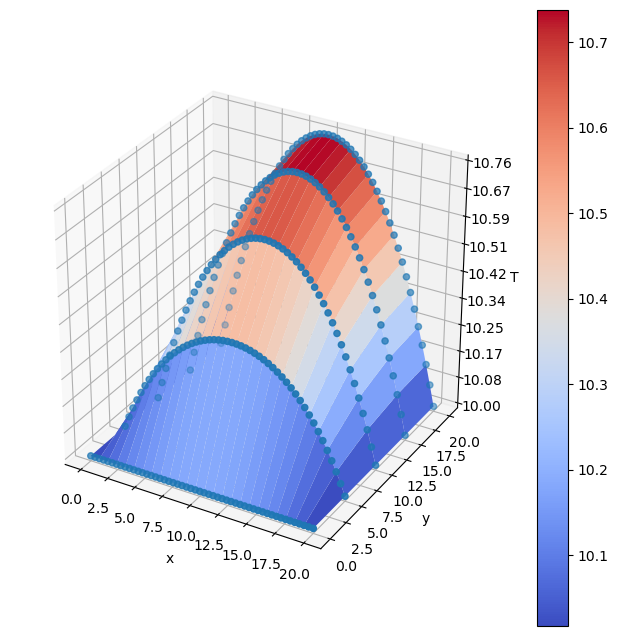




 Snap 9 



initial residual = 12601.276308862416 

iter 0, NL residual=1857.0462564585055, delta=10.016111397172208
iter 1, NL residual=25.076307937586055, delta=-0.9830147165117947
iter 2, NL residual=0.005284775733179206, delta=-0.012251129648249393
iter 3, NL residual=2.802775082267266e-10, delta=-2.012560741461733e-06
Convergence !!!


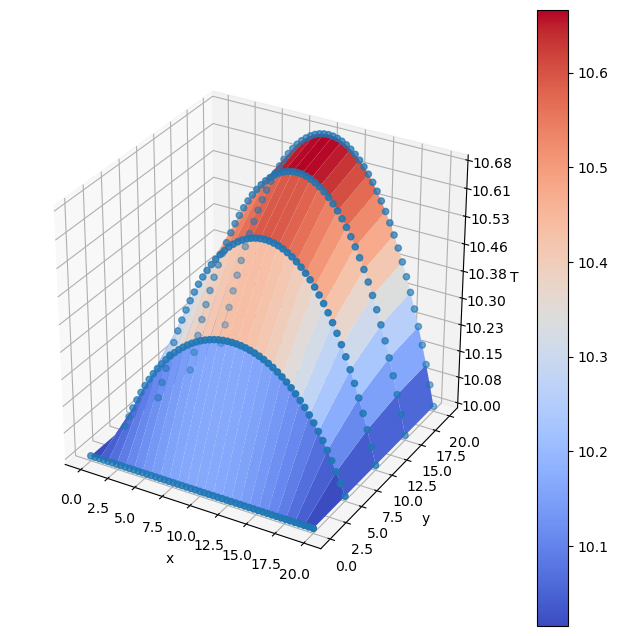




 Snap 10 



initial residual = 12140.302502454553 

iter 0, NL residual=1453.3175388282611, delta=9.833052144904274
iter 1, NL residual=14.12219359089362, delta=-0.8193726717310355
iter 2, NL residual=0.0015157108549731686, delta=-0.0073127839566327485
iter 3, NL residual=6.074580407401862e-11, delta=-6.154569538683099e-07
Convergence !!!


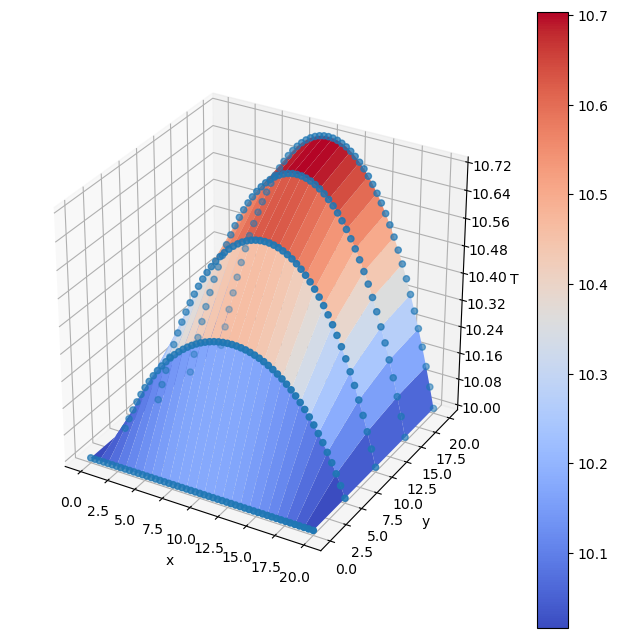




 Snap 11 



initial residual = 11064.834495879742 

iter 0, NL residual=616.0053869417208, delta=9.384376348132012
iter 1, NL residual=1.606759904362956, delta=-0.4060214096605569
iter 2, NL residual=1.202870103291367e-05, delta=-0.0009662780627629353
iter 3, NL residual=3.573747145199104e-11, delta=-5.7689925979903725e-09
Convergence !!!


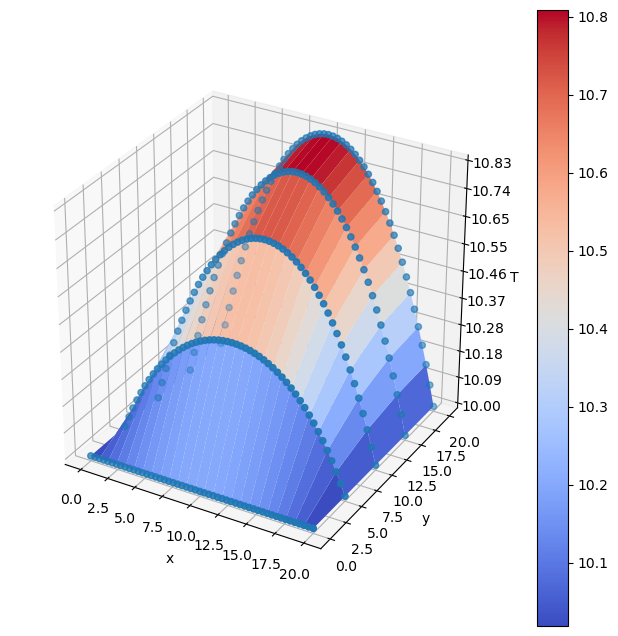




 Snap 12 



initial residual = 11154.448521159917 

iter 0, NL residual=680.074652092181, delta=9.422971109045507
iter 1, NL residual=2.0879360440243087, delta=-0.44222931991353054
iter 2, NL residual=2.170384471683257e-05, delta=-0.0012390495023096384
iter 3, NL residual=3.674459898869056e-11, delta=-1.0255342003648238e-08
Convergence !!!


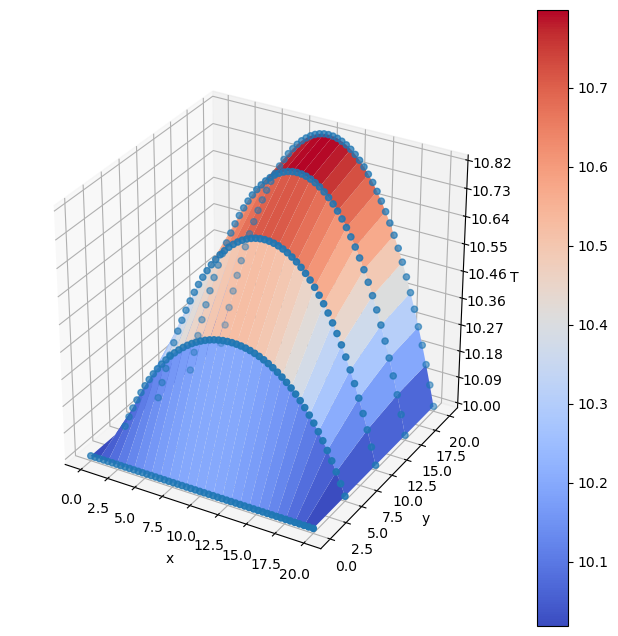




 Snap 13 



initial residual = 12633.289529023508 

iter 0, NL residual=1886.0616636341792, delta=10.028628083981312
iter 1, NL residual=25.9835885640026, delta=-0.9940940284622881
iter 2, NL residual=0.005706734879676642, delta=-0.012644653410365936
iter 3, NL residual=3.18430318026223e-10, delta=-2.1638957469904146e-06
Convergence !!!


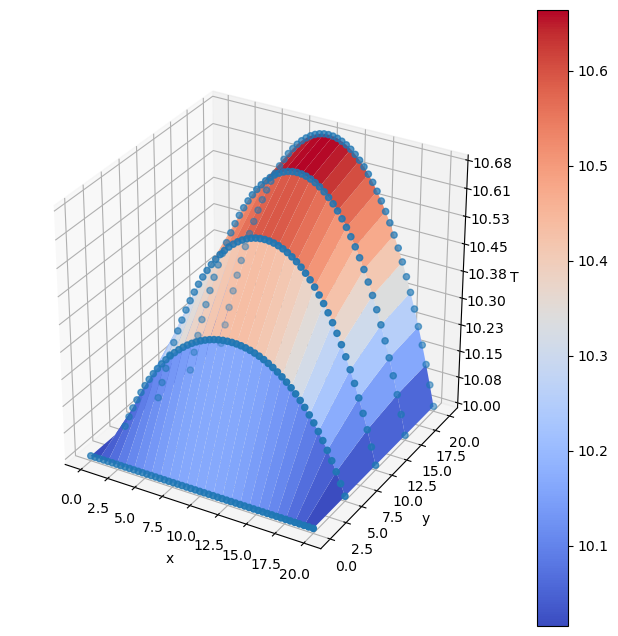




 Snap 14 



initial residual = 11391.29333804649 

iter 0, NL residual=854.4426007791867, delta=9.523891675152585
iter 1, NL residual=3.781049519870575, delta=-0.5363486845869734
iter 2, NL residual=8.217370874450559e-05, delta=-0.002167959253620812
iter 3, NL residual=4.040347681664785e-11, delta=-3.736525535080068e-08
Convergence !!!


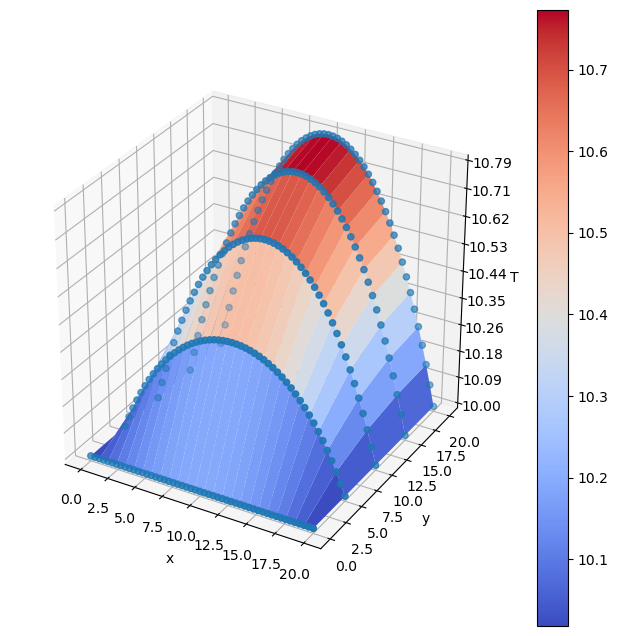

In [8]:
for i in range(N_snap):
    print(f"\n\n\n Snap {i} \n\n\n")
    param = random.choice(params) # Choose from parameter list
    param_list.append(param)
    
    if i==0:
        d = probdata(bc, mat_layout, src_layout, fdict, nref, L, param, pb_dim=2)
        FOS = Base_class_fem_heat_conduction(d,quad_deg)
    else:
        FOS.mu = param
    T_init = np.zeros(d.n_verts) + 2.0
    NL_solution_p, Ke, rhs_e, mask = solve_fos(FOS, T_init)
    NL_solutions.append(NL_solution_p.flatten())
    K_mus.append(Ke)
    q_mus.append(rhs_e)
    plot2D(d.xi[0], d.xi[1], NL_solution_p)

In [9]:
NLS = np.asarray(NL_solutions)
np.shape(NLS)

(15, 255)

### ECSW Hyper-reduction


#### Step 1: Perform SVD on the snapshots (calculate $\mathbb{V}(=\mathbb{W}$)):

In [10]:
n_sel = 4
U, S, Vt = np.linalg.svd(np.transpose(NLS), full_matrices=False)
V_sel = U[:, :n_sel]
P_sel = V_sel[mask,:]@np.transpose(V_sel[mask,:])

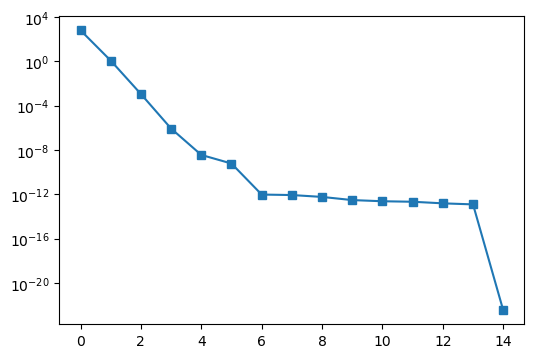

In [11]:
plt.figure(figsize = (6,4))
plt.semilogy(S,'s-')
plt.show()

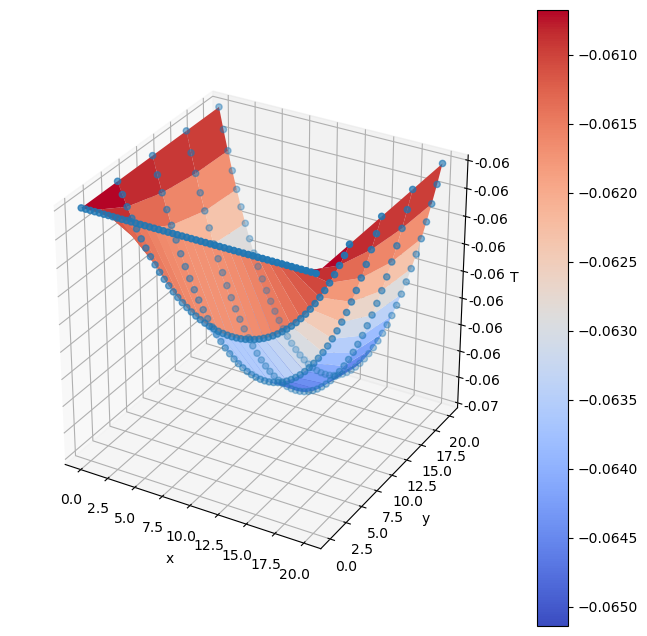

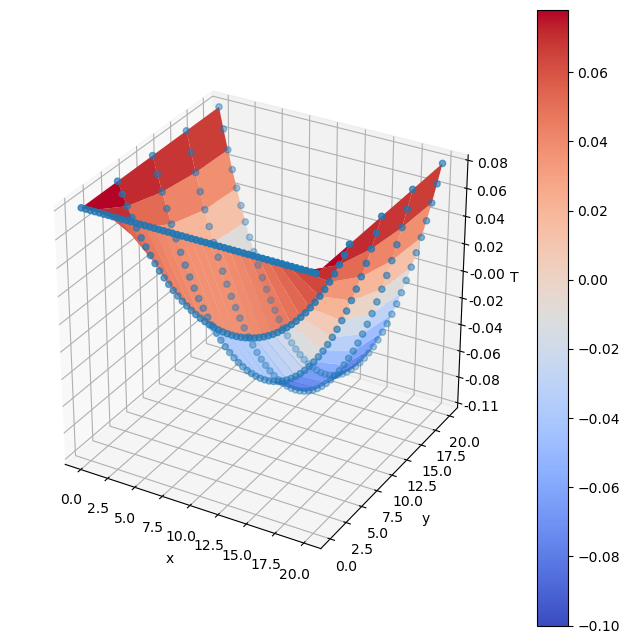

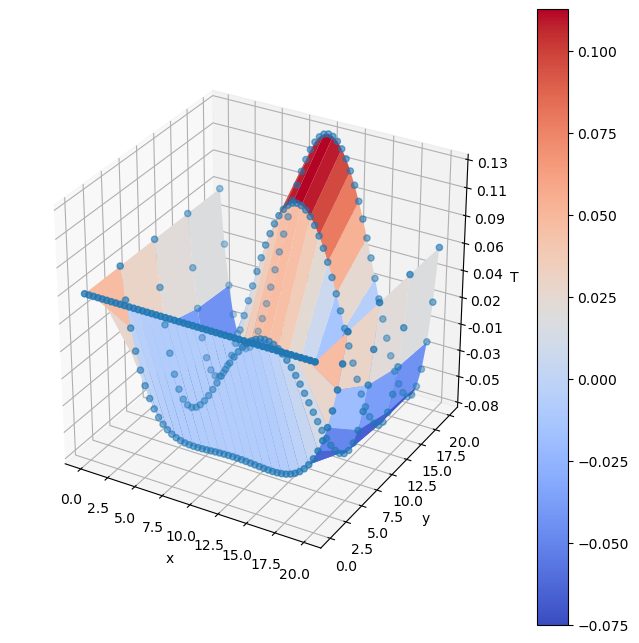

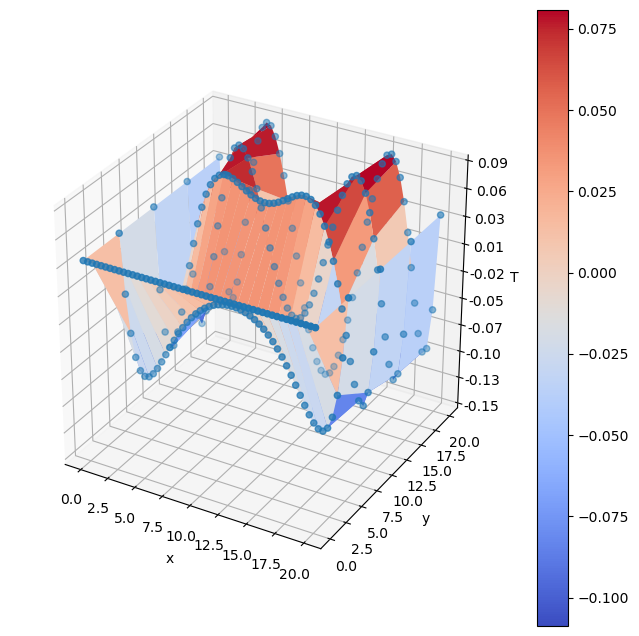

In [12]:
for i in range(n_sel):
    plot2D(d.xi[0], d.xi[1], V_sel[:,i])


#### ECSW

In [32]:
tic_h_setup_b = time.time()
tol = 1e-11
xi, residual = ecsw_red(d, V_sel, d.Le, K_mus, q_mus, n_sel, N_snap, mask,NL_solutions, tol=tol)
toc_h_setup_b = time.time()

In [33]:
print(f"this is the residual from fnnls: {residual}")

this is the residual from fnnls: 7.477797790548108e-07


In [34]:
colors = ['red' if value > 0 else 'blue' for value in xi]
sizes = [15 if value > 0 else 1 for value in xi]

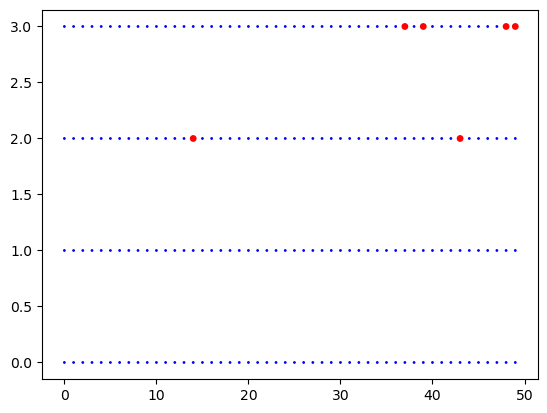

In [35]:
plot2D(np.arange(d.ncells[0]),np.arange(d.ncells[1]), xi, scattr=True, clr=colors, sz=sizes)

In [36]:
print(f"Fraction of total elements active in the ROM: {len(xi[xi>0])*100/len(xi)}%")

Fraction of total elements active in the ROM: 3.0%



### ROM Simulation

In [37]:
params_rm = params[~np.isin(params,param_list)]
param_rom = random.choice(params_rm)

In [38]:
# Define the data-class

d_test = probdata(bc, mat_layout, src_layout, fdict, nref, L, param_rom, pb_dim=2)
FOS_test = Base_class_fem_heat_conduction(d_test,quad_deg)
ROM = FEM_solver_rom_ecsw(d_test, quad_deg)

In [39]:
# Initial guess

T_init_fos = np.zeros(FOS_test.n_nodes) + 2.
T_init_rom = np.transpose(V_sel)@T_init_fos # crucial to ensure the initial guess is contained in the reduced subspace

In [40]:
# Time taken to perform a FO simulation with the current parameter value

tic_fos = time.time()
NL_solution_p_fos_test, _, _, _, = solve_fos(FOS_test,T_init_fos)
toc_fos = time.time()

initial residual = 11839.406876314039 

iter 0, NL residual=1204.1482272617636, delta=9.710640238988155
iter 1, NL residual=8.954715747533228, delta=-0.7082907108304918
iter 2, NL residual=0.0005571970098416532, delta=-0.004825068882310571
iter 3, NL residual=5.400782938625764e-11, delta=-2.3643937605583957e-07
Convergence !!!


In [41]:
# Time taken to simulate a ROM without hyper-reduction

tic_rom_woh = time.time()
NL_solution_p_reduced_woh = ROM.solve_rom(T_init_rom,np.ones_like(xi),V_sel)
toc_rom_woh = time.time()

initial residual = 3093.588819067262 

iter 0, NL residual=5.025653611012314, delta=-2.7721799682761377e-05


c:\Users\supar\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


iter 1, NL residual=0.00818001715848066, delta=1.1170040801051897
iter 2, NL residual=2.4726416060799482e-08, delta=0.0012758049890004186
Convergence !!!


In [42]:
# Time taken to simulate a ROM *with* hyper-reduction

tic_rom = time.time()
NL_solution_p_reduced = ROM.solve_rom(T_init_rom,xi,V_sel)
toc_rom = time.time()

initial residual = 0.7554641684911987 

iter 0, NL residual=0.0009875092084944347, delta=-9.958626647212375e-05
iter 1, NL residual=2.8966893628913547e-06, delta=1.1172459578712572
Convergence !!!


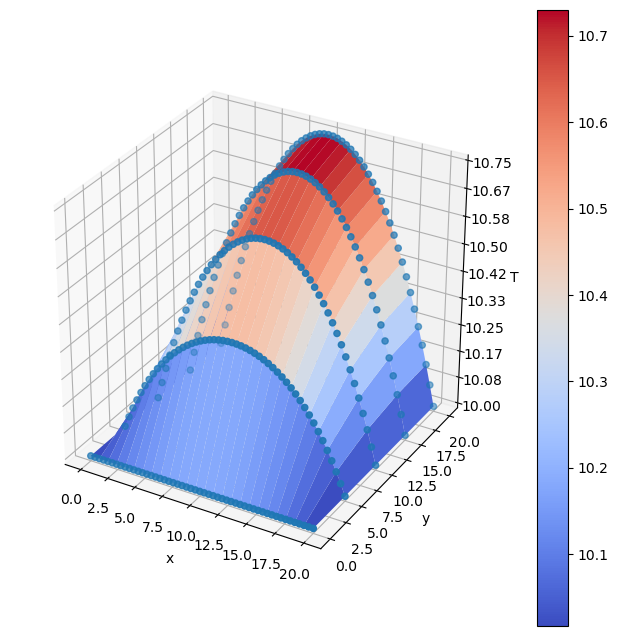

RMS_error is 0.0010584873085830936 %


In [43]:
sol_red = V_sel@NL_solution_p_reduced.reshape(-1,1)  #+pca.mean_.reshape(-1,1)
plot2D(d_test.xi[0], d_test.xi[1], sol_red)

print(f"RMS_error is {np.linalg.norm(sol_red-NL_solution_p_fos_test.reshape(-1,1))*100/np.linalg.norm(NL_solution_p_fos_test.reshape(-1,1))} %")

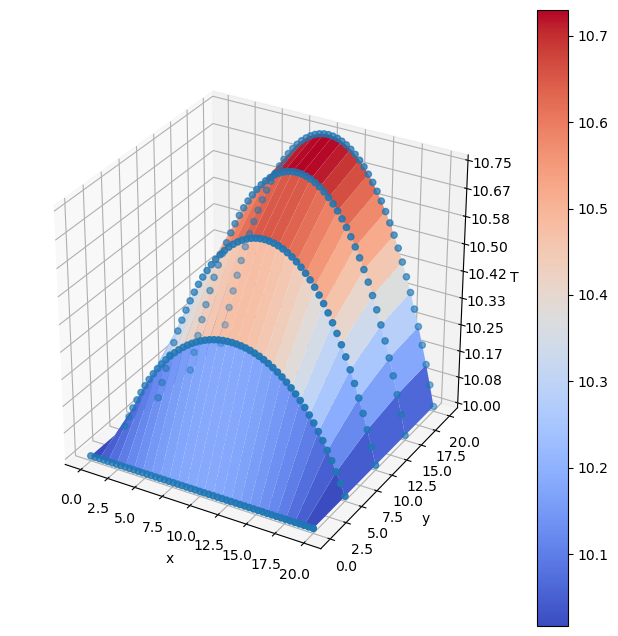



ROM Error without hyperreduction is 2.3253909682701527e-09 %


In [44]:
plot2D(d_test.xi[0], d_test.xi[1], NL_solution_p_fos_test)

print(f"\n\nROM Error without hyperreduction is {np.linalg.norm(V_sel@NL_solution_p_reduced_woh.reshape(-1,1)-NL_solution_p_fos_test.reshape(-1,1))*100/np.linalg.norm(NL_solution_p_fos_test.reshape(-1,1))} %")


#### Speedups

In [45]:
fos_sim_time = toc_fos - tic_fos
rom_sim_time_woh = toc_rom_woh - tic_rom_woh
rom_sim_time = toc_rom - tic_rom

In [46]:
print(f"speedup without hyperreduction:{fos_sim_time/rom_sim_time_woh}")
print(f"speedup with hyperreduction:{fos_sim_time/(rom_sim_time)}")
# h_total_setup_time = (toc_h_setup_b+toc_h_setup_a) - (tic_h_setup_b+tic_h_setup_a) #this is one time

speedup without hyperreduction:1.269505461880573
speedup with hyperreduction:38.030205349612096
